In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("complete_airfoil_data.csv")
df

,alpha,CL,CD,CDp,CM,Top_Xtr,Bot_Xtr,airfoil_list,max_thickness,chord_at_max_thickness,max_camber,chord_at_max_camber,reynolds_no,cl_cd,max_cl_cd
0,-9.00,-0.5693,0.10116,0.09376,0.0165,1.0000,0.3639,n0009sm-il,9.0,30.9,0.0,0.0,50000,-5.627718,27.028721
1,-8.75,-0.7142,0.07868,0.07178,-0.0149,1.0000,0.1757,n0009sm-il,9.0,30.9,0.0,0.0,50000,-9.077275,27.028721
2,-8.50,-0.7137,0.07346,0.06654,-0.0151,1.0000,0.1724,n0009sm-il,9.0,30.9,0.0,0.0,50000,-9.715491,27.028721
3,-8.25,-0.7642,0.06347,0.05612,-0.0184,1.0000,0.1482,n0009sm-il,9.0,30.9,0.0,0.0,50000,-12.040334,27.028721
4,-8.00,-0.7681,0.05866,0.05100,-0.0173,1.0000,0.1481,n0009sm-il,9.0,30.9,0.0,0.0,50000,-13.094102,27.028721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12810,18.25,1.6669,0.09832,0.09337,-0.0792,0.0132,0.9999,naca6412-il,12.0,30.1,6.0,39.6,1000000,16.953824,142.652608
12811,18.50,1.6597,0.10266,0.09779,-0.0798,0.0130,0.9999,naca6412-il,12.0,30.1,6.0,39.6,1000000,16.166959,142.652608
12812,18.75,1.6514,0.10721,0.10243,-0.0806,0.0128,0.9999,naca6412-il,12.0,30.1,6.0,39.6,1000000,15.403414,142.652608
12813,19.00,1.6422,0.11196,0.10727,-0.0815,0.0126,0.9999,naca6412-il,12.0,30.1,6.0,39.6,1000000,14.667738,142.652608


In [3]:
df.describe()

,alpha,CL,CD,CDp,CM,Top_Xtr,Bot_Xtr,max_thickness,chord_at_max_thickness,max_camber,chord_at_max_camber,reynolds_no,cl_cd,max_cl_cd
count,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000
mean,1.121537,0.230372,0.033319,0.026326,-0.032100,0.615111,0.649629,14.966680,29.685462,1.931526,27.966352,401271.946937,11.079366,59.059308
std,8.975773,0.841372,0.026662,0.026552,0.040369,0.367029,0.398930,5.008773,1.387206,1.754560,18.690653,409431.521754,39.141797,29.905563
min,-19.750000,-1.564400,0.003920,0.000840,-0.157400,0.003300,0.003200,8.000000,22.500000,0.000000,0.000000,50000.000000,-81.968379,1.759210
25%,-5.875000,-0.503950,0.014435,0.007520,-0.054800,0.235450,0.196600,11.000000,29.900000,0.000000,0.000000,100000.000000,-17.828405,37.303285
50%,1.250000,0.286000,0.024320,0.016590,-0.026900,0.710200,0.954700,14.000000,30.000000,2.000000,40.000000,200000.000000,10.815303,53.646512
75%,8.250000,1.001500,0.043320,0.035655,-0.002800,1.000000,1.000000,18.000000,30.000000,2.500000,40.000000,1000000.000000,36.669181,75.596171
max,19.250000,1.708400,0.195610,0.189020,0.072800,1.000100,1.000000,24.000000,30.900000,6.000000,50.000000,1000000.000000,150.987342,150.987342


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12815 entries, 0 to 12814
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   alpha                   12815 non-null  float64
 1   CL                      12815 non-null  float64
 2   CD                      12815 non-null  float64
 3   CDp                     12815 non-null  float64
 4   CM                      12815 non-null  float64
 5   Top_Xtr                 12815 non-null  float64
 6   Bot_Xtr                 12815 non-null  float64
 7   airfoil_list            12815 non-null  object 
 8   max_thickness           12815 non-null  float64
 9   chord_at_max_thickness  12815 non-null  float64
 10  max_camber              12815 non-null  float64
 11  chord_at_max_camber     12815 non-null  float64
 12  reynolds_no             12815 non-null  int64  
 13  cl_cd                   12815 non-null  float64
 14  max_cl_cd               12815 non-null

<AxesSubplot:>

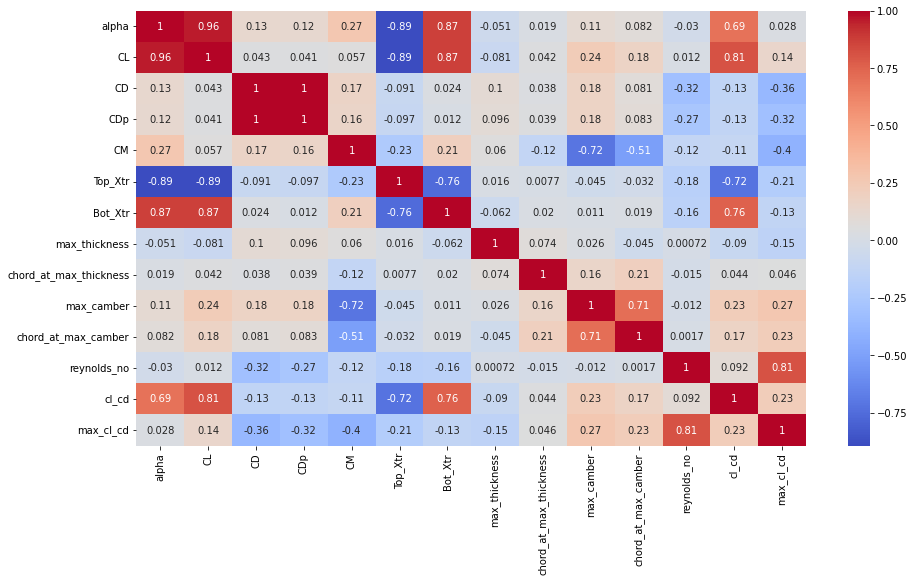

In [5]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot =True, cmap='coolwarm', linewidths=0.001)

In [6]:
X = df[["alpha", "CDp", "CM", "max_thickness", "reynolds_no", "max_camber", "cl_cd", "max_cl_cd"]]
Y = df[["CD"]]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.07, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [10]:
classifier = Sequential()

classifier.add(Dense(units=13, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=4, activation="relu"))
classifier.add(Dense(units=4, activation="relu"))
classifier.add(Dense(units=1, activation="linear"))

In [11]:
#opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
classifier.compile(optimizer="adam", loss="mse")
model_history = classifier.fit(x_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
336/336 [==============================] - 3s 4ms/step - loss: 6.8526e-04 - val_loss: 2.0449e-04
Epoch 2/100
336/336 [==============================] - 1s 3ms/step - loss: 7.8935e-05 - val_loss: 2.2567e-05
Epoch 3/100
336/336 [==============================] - 1s 3ms/step - loss: 2.0956e-05 - val_loss: 1.2185e-05
Epoch 4/100
336/336 [==============================] - 1s 3ms/step - loss: 1.2674e-05 - val_loss: 7.4642e-06
Epoch 5/100
336/336 [==============================] - 1s 3ms/step - loss: 9.0113e-06 - val_loss: 5.1482e-06
Epoch 6/100
336/336 [==============================] - 1s 3ms/step - loss: 6.8466e-06 - val_loss: 3.3733e-06
Epoch 7/100
336/336 [==============================] - 1s 3ms/step - loss: 5.5835e-06 - val_loss: 2.7075e-06
Epoch 8/100
336/336 [==============================] - 1s 3ms/step - loss: 4.4078e-06 - val_loss: 2.4783e-06
Epoch 9/100
336/336 [==============================] - 1s 3ms/step - loss: 4.1900e-06 - val_loss: 4.3209e-06
Epoch 10/100
336/33

336/336 [==============================] - 1s 4ms/step - loss: 5.7934e-07 - val_loss: 6.3141e-07
Epoch 76/100
336/336 [==============================] - 1s 3ms/step - loss: 5.7985e-07 - val_loss: 1.9428e-06
Epoch 77/100
336/336 [==============================] - 1s 3ms/step - loss: 6.1992e-07 - val_loss: 3.5872e-07
Epoch 78/100
336/336 [==============================] - 1s 3ms/step - loss: 4.5879e-07 - val_loss: 3.5354e-07
Epoch 79/100
336/336 [==============================] - 1s 3ms/step - loss: 5.8381e-07 - val_loss: 1.7838e-06
Epoch 80/100
336/336 [==============================] - 1s 3ms/step - loss: 5.6216e-07 - val_loss: 6.6744e-07
Epoch 81/100
336/336 [==============================] - 1s 4ms/step - loss: 6.1619e-07 - val_loss: 5.9871e-07
Epoch 82/100
336/336 [==============================] - 1s 3ms/step - loss: 5.3906e-07 - val_loss: 4.1748e-07
Epoch 83/100
336/336 [==============================] - 1s 4ms/step - loss: 5.3384e-07 - val_loss: 1.7184e-06
Epoch 84/100
336/336 [=

<AxesSubplot:>

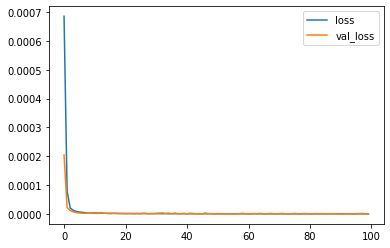

In [12]:
losses = pd.DataFrame(classifier.history.history)
losses[['loss', 'val_loss']].plot()

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
print(y_pred.shape)
print(y_test.shape)

(898, 1)
(898, 1)


In [15]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE = ", 100*mean_absolute_percentage_error(y_test, y_pred))

MAPE =  2.2217634336953744


In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9994402778981323


In [17]:
from sklearn.metrics import mean_squared_error
print("MSE = ", mean_squared_error(y_test, y_pred))

MSE =  3.8769575725229233e-07


In [18]:
y_pred

array([[0.03960045],
       [0.01884611],
       [0.03122859],
       [0.01930416],
       [0.04179677],
       [0.02065098],
       [0.0486163 ],
       [0.0124006 ],
       [0.02040441],
       [0.02207987],
       [0.02761844],
       [0.02731417],
       [0.00673233],
       [0.06262138],
       [0.06971346],
       [0.00871351],
       [0.01614207],
       [0.01134139],
       [0.11851537],
       [0.01110913],
       [0.01055017],
       [0.04800323],
       [0.01882093],
       [0.02277792],
       [0.02823387],
       [0.01197045],
       [0.01882695],
       [0.02772737],
       [0.04666696],
       [0.01460765],
       [0.04541393],
       [0.00678444],
       [0.09223299],
       [0.01951429],
       [0.03175078],
       [0.06192882],
       [0.03186621],
       [0.01037326],
       [0.02860793],
       [0.04542285],
       [0.01069506],
       [0.0222712 ],
       [0.05841054],
       [0.04697584],
       [0.10361809],
       [0.01159403],
       [0.01997678],
       [0.013

In [19]:
y_test

,CD
9406,0.04009
10200,0.01835
385,0.03186
7200,0.01911
8,0.04225
...,...
4122,0.07319
850,0.03037
11451,0.13116
1570,0.01392


In [20]:
(y_test ==0).sum()

CD    0
dtype: int64

In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9994773705194285

In [22]:
(np.sum(np.abs(((y_test - y_pred)*100)/y_test)))/898

CD    2.221763
dtype: float64